In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## Part 2, Question 1

In [13]:
ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=(4,), activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

ANN_model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

ANN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 3)                 15        
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
Total params: 47 (188.00 Byte)
Trainable params: 47 (188.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Part 2, Question 2

In [19]:
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(30,30,1), kernel_size=(3,3), filters=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=4, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])
    
CNN_model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

CNN_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 2)         20        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 4)         76        
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 196)               0         
                                                                 
 dense_18 (Dense)            (None, 3)               

## Part 3

In [2]:
data = pd.read_csv('Final_News_DF_Labeled_ExamDataset.csv')
data

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels = list(data.loc[:,'LABEL'])
labels_encoded = []
for lab in labels:
    if lab == 'politics':
        labels_encoded += [[1, 0, 0]]
    elif lab == 'football':
        labels_encoded += [[0, 1, 0]]
    elif lab == 'science':
        labels_encoded += [[0, 0, 1]]
labels_encoded = np.array(labels_encoded)

words = list(data.loc[:, data.columns != 'LABEL'].columns)

freqs = np.array(data.loc[:, data.columns != 'LABEL'])
freqs_norm = np.zeros(freqs.shape, dtype=float)
for rowInd in range(freqs.shape[0]):
    num_top_words = np.sum(freqs[rowInd,:])
    if num_top_words != 0:
        freqs_norm[rowInd,:] = freqs[rowInd,:] / num_top_words

p_test = 0.1
x_train, x_val, y_train, y_val = train_test_split(freqs_norm, labels_encoded, test_size=p_test, random_state=10)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=p_test/(1 - p_test))

In [4]:
ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(300,), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax'),
])

ANN_model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 46979 (183.51 KB)
Trainable params: 46979 (183.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
hist = ANN_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
38/38 [==============================] - 2s 12ms/step - loss: 1.0970 - accuracy: 0.3688 - val_loss: 1.0856 - val_accuracy: 0.4800
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 1.0747 - accuracy: 0.5113 - val_loss: 1.0564 - val_accuracy: 0.5800
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 1.0214 - accuracy: 0.5817 - val_loss: 0.9726 - val_accuracy: 0.6467
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.8950 - accuracy: 0.6806 - val_loss: 0.8131 - val_accuracy: 0.6867
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.7291 - accuracy: 0.7360 - val_loss: 0.6740 - val_accuracy: 0.7800
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.7561 - val_loss: 0.6198 - val_accuracy: 0.7867
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.7913 - val_loss: 0.6137 - val_accuracy: 0.7600
Epoch 8/10
38/38 [=

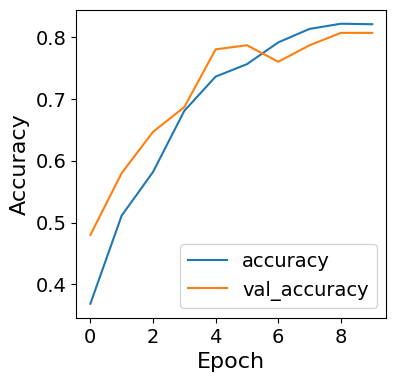

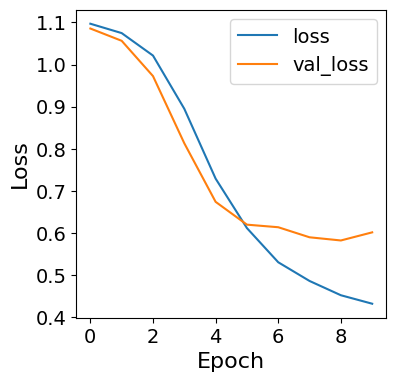

In [6]:
plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(fontsize=14)
plt.show()

5/5 [==============================] - 0s 2ms/step


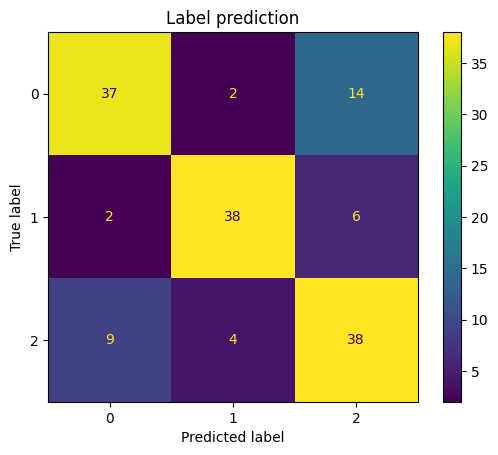

In [7]:
test_loss, test_accuracy = ANN_model.evaluate(x_test, y_test)

predictions = ANN_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

labels = np.arange(predictions.shape[1])
cm = confusion_matrix(true_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()
display.ax_.set_title('Label prediction')
plt.show()

In [87]:
x_train_CNN = x_train.reshape((len(x_train), 20, 15))
x_val_CNN = x_val.reshape((len(x_val), 20, 15))
x_test_CNN = x_test.reshape((len(x_test), 20, 15))

CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(20,15,1), kernel_size=5, filters=2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(kernel_size=5, filters=2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

CNN_model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

CNN_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 16, 11, 2)         52        
                                                                 
 dropout_31 (Dropout)        (None, 16, 11, 2)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 7, 2)          102       
                                                                 
 dropout_32 (Dropout)        (None, 12, 7, 2)          0         
                                                                 
 flatten_8 (Flatten)         (None, 168)               0         
                                                                 
 dense_25 (Dense)            (None, 32)                5408      
                                                                 
 dropout_33 (Dropout)        (None, 32)              

In [88]:
hist = CNN_model.fit(x_train_CNN, y_train, validation_data=(x_val_CNN, y_val), epochs=10)

Epoch 1/10
38/38 [==============================] - 2s 15ms/step - loss: 1.0989 - accuracy: 0.3345 - val_loss: 1.0977 - val_accuracy: 0.3000
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0990 - accuracy: 0.3370 - val_loss: 1.0973 - val_accuracy: 0.3200
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0978 - accuracy: 0.3395 - val_loss: 1.0983 - val_accuracy: 0.2867
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0979 - accuracy: 0.3311 - val_loss: 1.0978 - val_accuracy: 0.2867
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0980 - accuracy: 0.3168 - val_loss: 1.0977 - val_accuracy: 0.2533
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0976 - accuracy: 0.3495 - val_loss: 1.0976 - val_accuracy: 0.2600
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0963 - accuracy: 0.3470 - val_loss: 1.0974 - val_accuracy: 0.2800
Epoch 8/10
38/38 [=

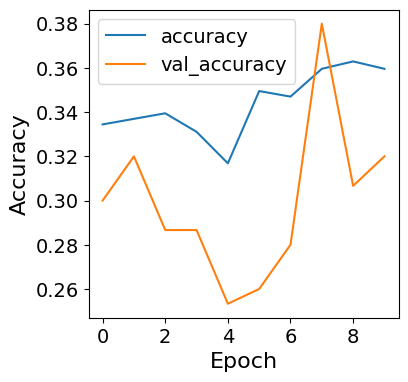

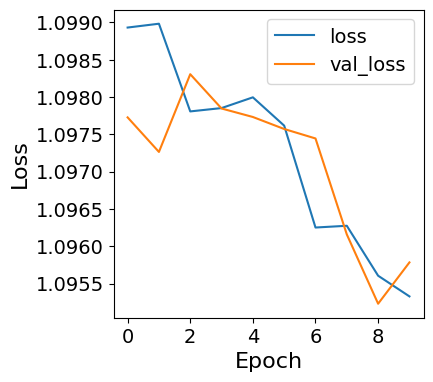

In [89]:
plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(fontsize=14)
plt.show()

5/5 [==============================] - 0s 3ms/step


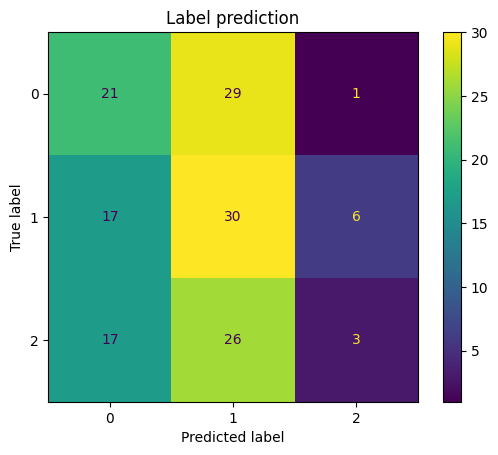

In [90]:
test_loss, test_accuracy = CNN_model.evaluate(x_test_CNN, y_test)

predictions = CNN_model.predict(x_test_CNN)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

labels = np.arange(predictions.shape[1])
cm = confusion_matrix(true_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()
display.ax_.set_title('Label prediction')
plt.show()

In [96]:
articles, lengths = [], []
for freq in freqs:
    article = []
    length = 0
    
    for i in range(len(freq)):
        article += [i] * freq[i]
        length += freq[i]

    articles += [article]
    lengths += [length]

max_length = max(lengths)
x_data = 300 * np.ones((len(articles), max_length), dtype=float)
for i in range(len(articles)):
    for j in range(len(articles[i])):
        x_data[i,j] = articles[i][j]

p_test = 0.1
x_train_RNN, x_val_RNN, y_train, y_val = train_test_split(x_data, labels_encoded, test_size=p_test, random_state=10)
x_train_RNN, x_test_RNN, y_train, y_test = train_test_split(x_train_RNN, y_train, test_size=p_test/(1 - p_test))

In [97]:
RNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=301, output_dim=8, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=.1)),
    tf.keras.layers.Dense(3, activation='softmax')
])

RNN_model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

RNN_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 17, 8)             2408      
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                10496     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 3)                 195       
                                                                 
Total params: 13099 (51.17 KB)
Trainable params: 13099 (51.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
hist = RNN_model.fit(x_train_RNN, y_train, validation_data=(x_val_RNN, y_val), epochs=10)

Epoch 1/10
38/38 [==============================] - 7s 45ms/step - loss: 1.0958 - accuracy: 0.4166 - val_loss: 1.0873 - val_accuracy: 0.5267
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 1.0477 - accuracy: 0.5197 - val_loss: 0.9712 - val_accuracy: 0.4200
Epoch 3/10
38/38 [==============================] - 0s 12ms/step - loss: 0.7981 - accuracy: 0.6396 - val_loss: 0.6905 - val_accuracy: 0.6467
Epoch 4/10
38/38 [==============================] - 0s 12ms/step - loss: 0.6361 - accuracy: 0.7368 - val_loss: 0.6501 - val_accuracy: 0.7067
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.5621 - accuracy: 0.7762 - val_loss: 0.6180 - val_accuracy: 0.7400
Epoch 6/10
38/38 [==============================] - 1s 13ms/step - loss: 0.5230 - accuracy: 0.7913 - val_loss: 0.6033 - val_accuracy: 0.7467
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.4629 - accuracy: 0.8189 - val_loss: 0.6153 - val_accuracy: 0.7867
Epoch 8/10
38

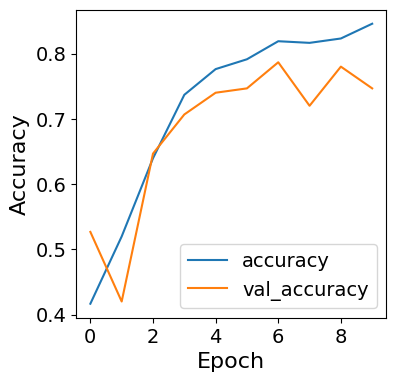

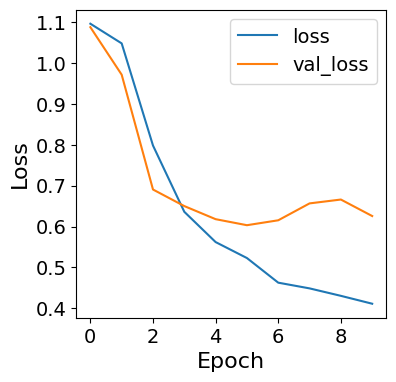

In [99]:
plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(4,4))
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(fontsize=14)
plt.show()

5/5 [==============================] - 1s 5ms/step


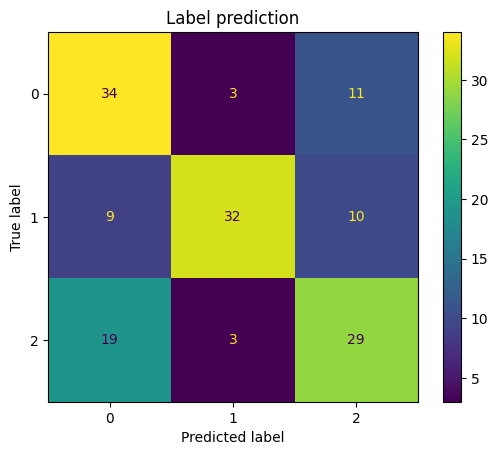

In [100]:
test_loss, test_accuracy = RNN_model.evaluate(x_test_RNN, y_test)

predictions = RNN_model.predict(x_test_RNN)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

labels = np.arange(predictions.shape[1])
cm = confusion_matrix(true_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()
display.ax_.set_title('Label prediction')
plt.show()